In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing the Order_product_Merge Dataframe used to Order and Product dataframe
merged_df = pd.read_pickle(r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Data\Prepared_Data\df_order_product_customer.pkl")
merged_df.head(6)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [3]:
# include all the columns 
pd.set_option('display.max_columns', None)

# checking the dataframe 


merged_df.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [4]:
incomedf = merged_df['income']
incomedf

0            40423
1            40423
2            40423
3            40423
4            40423
             ...  
32404854     36899
32404855     36899
32404856    116193
32404857    116193
32404858    142822
Name: income, Length: 32404859, dtype: int64

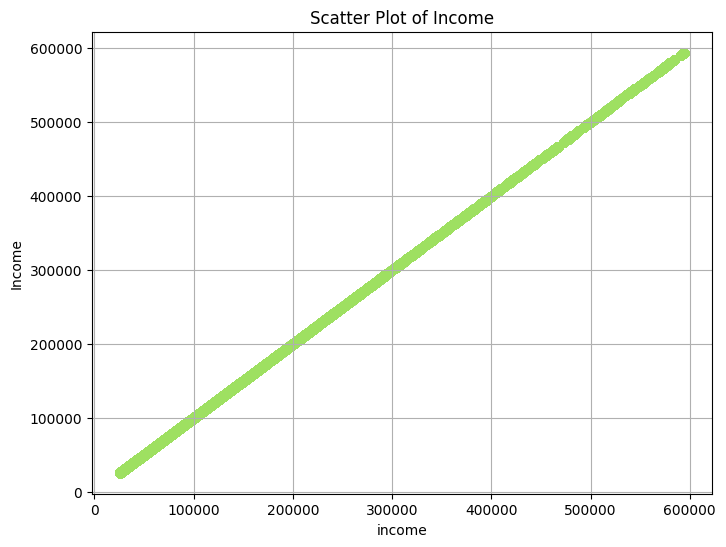

In [5]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.scatter(incomedf, incomedf, color='#9ee061', alpha=0.5)  # Plot the scatter plot
plt.title('Scatter Plot of Income')  # Add a title
plt.xlabel('income')  # Add label for x-axis
plt.ylabel('Income')  # Add label for y-axis
plt.grid(True)  # Add grid (optional)
plt.show()

In [6]:
pricesdf = merged_df['prices']
percento = pricesdf.describe(percentiles=[0.25, 0.5, 0.75])
pricesdf50= percento['50%']
pricesdf75 = percento['75%'] 
pricesdf50


7.4

In [7]:
pricesdf75


11.3

In [8]:
merged_df = merged_df[merged_df['prices'] <= 1400]
merged_df['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [9]:
pricesdf = merged_df['prices']

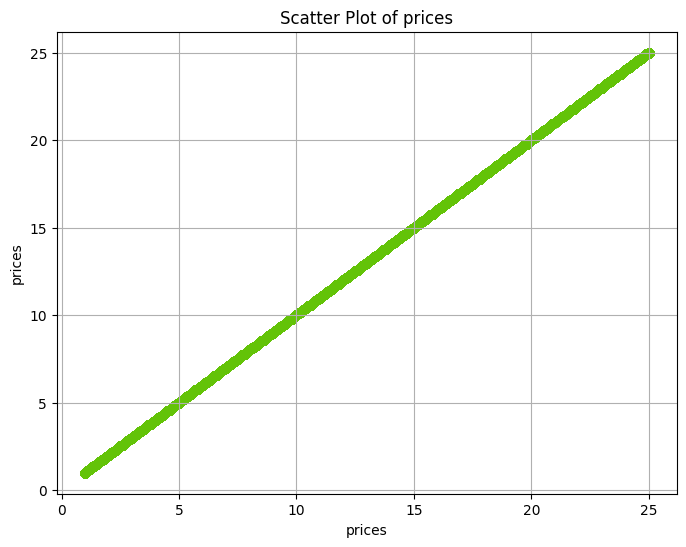

In [10]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.scatter(pricesdf, pricesdf, color='#63C308', alpha=0.5)  # Plot the scatter plot
plt.title('Scatter Plot of prices')  # Add a title
plt.xlabel('prices')  # Add label for x-axis
plt.ylabel('prices')  # Add label for y-axis
plt.grid(True)  # Add grid (optional)
plt.show()

### Before i run any analysis on a dataset and i observed that the dataframe contains personally identifiable information (PII) such as names, 
### it's crucial to ensure that you handle the data in a way that complies with GDPR and other data protection regulations.
# 
### Documentation and Compliance: Keep thorough documentation of how the data is being used and the measures you have taken to ensure compliance. 
### Be prepared to demonstrate compliance to regulatory authorities if required.

### Retention Policy: Establish a clear data retention policy. Only keep the data for as long as is necessary and ensure it is securely deleted after use.

### Awareness and Training: Make sure that everyone involved in the analysis is aware of their obligations under GDPR and is trained in data protection.

In [11]:
# Therefore, drop first name and surname from the dataframe 
merged_df.drop(columns=['First Name','Surname'], inplace=True)

In [12]:

# Dictionary to map states to regions
region_mapping = {
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West',
    'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West',
    'Arizona': 'West', 'New Mexico': 'West', 'Alaska': 'West',
    'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'
}

In [13]:
# Map the states to the regions and create a new column
merged_df['Region'] = merged_df['State'].map(region_mapping)

In [14]:
# checking the dataframe 


merged_df.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South


In [15]:

# Group by 'Region' and 'spending_flag', count the number of occurrences, and then unstack to pivot the table
region_spending = merged_df.groupby(['Region', 'spending_flag']).size().unstack(fill_value=0)
region_spending.head()


spending_flag,High Spender,Low Spender
Region,,
Midwest,154715,7441350
Northeast,107381,5614511
South,207902,10582194
West,159120,8132559


# Exclusion profile

In [16]:

# Create the 'exclusion' column based on the 'order_number' condition
merged_df['exclusion'] = np.where(merged_df['order_number'] >= 5, 'High Activity', 'Low Activity')

In [17]:
merged_df['exclusion'].value_counts()

exclusion
High Activity    24411166
Low Activity      7988566
Name: count, dtype: int64

In [18]:
# Filter out rows where the 'Exclusion' column is 'Low Activity'
filter_ord_prod_cust = merged_df[merged_df['exclusion'] != 'Low Activity']
filter_ord_prod_cust.head(10)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,Region,exclusion
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity
10,2968173,15,15,1,9,7.0,196,2,0,Soda,77,7,9.0,both,99,Regular Customer,3.980556,Low Spender,10.0,Non-Frequent Customer,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,Midwest,High Activity
11,1870022,15,17,2,16,8.0,196,6,1,Soda,77,7,9.0,both,99,Regular Customer,3.980556,Low Spender,10.0,Non-Frequent Customer,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,Midwest,High Activity
12,1911383,15,18,2,11,7.0,196,1,1,Soda,77,7,9.0,both,99,Regular Customer,3.980556,Low Spender,10.0,Non-Frequent Customer,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,Midwest,High Activity
13,2715276,15,21,1,9,7.0,196,1,1,Soda,77,7,9.0,both,99,Regular Customer,3.980556,Low Spender,10.0,Non-Frequent Customer,Female,Indiana,69,2019-06-03,0,divorced/widowed,54313,Midwest,High Activity


In [19]:
# exporting the ord_prod_cust_activity
#path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Data\Prepared_Data"
#filter_ord_prod_cust.to_pickle(os.path.join(path, 'CFO_filter_ord_less5.pkl'))


#Commenting out this export code becuase it has been exported

In [20]:
# importing the Departments dataframe

df_department = pd.read_csv(r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Data\Prepared_Data\departments_wrangled.csv")

In [21]:
# checking the dataframe
df_department.head(50)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [22]:
# renaming the Unnamed:0 to department_id

df_department.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [23]:
# importing the Customer dataframe
df_customer = pd.read_pickle(r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Data\Prepared_Data\df_customer.pkl")

In [24]:
df_customer.head(10)

,user_id,First Name,Surname,Gender,State,Age,date_joined,number_of_dependants,marital_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374
5,133128,Cynthia,Noble,Female,Kentucky,43,2017-01-01,2,married,49643
6,152052,Chris,Walton,Male,Montana,20,2017-01-01,0,single,61746
7,168851,Joseph,Hickman,Male,South Carolina,30,2017-01-01,0,single,63712
8,69965,Jeremy,Vang,Male,Texas,47,2017-01-01,1,married,162432
9,82820,Shawn,Chung,Male,Virginia,26,2017-01-01,2,married,32072


In [25]:
df_customer['Age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: Age, dtype: float64

In [26]:
df_customer['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

In [27]:
df_customer['number_of_dependants'].describe()

count    206209.000000
mean          1.499823
std           1.118433
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: number_of_dependants, dtype: float64

In [28]:
merged_df.shape

(32399732, 29)

# Age Profiling

In [29]:
# creating an Age Profile from the Customer Dataframe <= 20
merged_df.loc[merged_df['Age'] <= 20, 'age_profile'] = 'Youth'

In [30]:
# creating an Age Profile form the Customer Dataframe > 20
merged_df.loc[(merged_df['Age'] > 20) & (merged_df['Age'] <= 35), 'age_profile'] = 'Adult'

In [31]:
# creating an Age Profile form the Customer Dataframe > 35
merged_df.loc[(merged_df['Age'] > 35) & (merged_df['Age'] <= 60), 'age_profile'] = 'Matured'

In [32]:
# creating an Age Profile form the Customer Dataframe > 50
merged_df.loc[merged_df['Age'] > 60, 'age_profile'] = 'Elderly'

In [33]:
merged_df['age_profile'].value_counts()

age_profile
Matured    12673629
Elderly    10581161
Adult       7622195
Youth       1522747
Name: count, dtype: int64

# income Profiling

In [34]:
# value count of income earners greater than 30000 and less than 70000

user_counts = merged_df.loc[(merged_df['income'] >= 30000) & (merged_df['income'] < 70000), 'user_id'].nunique()
user_counts 

66248

In [35]:
# creating an Income Profile from the Customer Dataframe <= 40000
merged_df.loc[merged_df['income'] <= 40000, 'income_profile'] = 'Low Earners' 

In [36]:
# creating an Income Profile from the Customer Dataframe > 40000 & <= 100000
merged_df.loc[(merged_df['income'] > 40000) & (merged_df['income'] <= 100000), 'income_profile'] = 'Medium Earners'

In [37]:
# creating an Income Profile from the Customer Dataframe > 100000
merged_df.loc[merged_df['income'] > 100000, 'income_profile'] = 'High Earners'

In [38]:
merged_df['income_profile'].value_counts()

income_profile
Medium Earners    15863176
High Earners      14809358
Low Earners        1727198
Name: count, dtype: int64

In [39]:
merged_df.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,Region,exclusion,age_profile,income_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners


# dependents profiling

# creating an dependents Profile from the Customer Dataframe


In [40]:
# Assuming merged_df is your DataFrame and it already contains 'age_profile' and 'number_of_dependants'

# Assign dependent profiles for individuals without dependants
merged_df.loc[(merged_df['number_of_dependants'] == 0) & (merged_df['age_profile'] == 'Youth'), 'age_dependant_profile'] = 'Single Youth'


In [41]:
merged_df.loc[(merged_df['number_of_dependants'] == 0) & (merged_df['age_profile'] == 'Adult'), 'age_dependant_profile'] = 'Single Adult'


In [42]:
merged_df.loc[(merged_df['number_of_dependants'] == 0) & (merged_df['age_profile'] == 'Matured'), 'age_dependant_profile'] = 'Single Matured'


In [43]:
merged_df.loc[(merged_df['number_of_dependants'] == 0) & (merged_df['age_profile'] == 'Elderly'), 'age_dependant_profile'] = 'Single Elderly'

In [44]:
# Assign dependent profiles for individuals with dependants
merged_df.loc[merged_df['number_of_dependants'] != 0, 'age_dependant_profile'] = merged_df['age_profile'] + ' with Dependents'

In [45]:

# Create a new column initialized to handle the zero dependants case
merged_df['age_dependant_profile'] = merged_df['marital_status'] + ' with no kids'


In [46]:
# For families with exactly one kid
merged_df.loc[merged_df['number_of_dependants'] == 1, 'marital status with kids'] = merged_df['marital_status'] + ' with 1 kid'

In [47]:
# For families with more than one kid
merged_df.loc[merged_df['number_of_dependants'] > 1, 'marital status with kids'] = merged_df['marital_status'] + ' with ' + merged_df['number_of_dependants'].astype(str) + ' kids'


# Department Profiling

In [48]:
merged_df.columns


Index(['order_id', 'user_id', 'order_number', 'order_days_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_before_order',
       'order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'Region',
       'exclusion', 'age_profile', 'income_profile', 'age_dependant_profile',
       'marital status with kids'],
      dtype='object')

In [49]:
# favourite department id from the order_product_merge dataframe

merged_df['department_id'].value_counts()


department_id
4     9479291
16    5393620
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [50]:
# Parents Profiling
merged_df['number_of_dependants'] = merged_df['number_of_dependants'].astype(int)


In [51]:
merged_df.loc[merged_df['number_of_dependants'] == 0, 'parents_profile'] = 'Not Parent'


In [52]:
merged_df.loc[merged_df['number_of_dependants'] == 1, 'parents_profile'] = 'Parent of 1'


In [53]:
merged_df.loc[merged_df['number_of_dependants'] == 2, 'parents_profile'] = 'Parent of 2'


In [54]:
merged_df.loc[merged_df['number_of_dependants'] == 3, 'parents_profile'] = 'Parent of 3'


In [55]:
merged_df['parents_profile'].value_counts()

parents_profile
Parent of 3    8133827
Not Parent     8096275
Parent of 2    8089749
Parent of 1    8079881
Name: count, dtype: int64

In [56]:

pd.set_option('display.max_columns', None)
merged_df.head(10)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,Region,exclusion,age_profile,income_profile,age_dependant_profile,marital status with kids,parents_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3


In [57]:
merged_df['age_profile'].value_counts()

age_profile
Matured    12673629
Elderly    10581161
Adult       7622195
Youth       1522747
Name: count, dtype: int64

# age and parent profile

In [58]:
#age and parent profile

merged_df['age_parent_profile'] = merged_df['age_profile'] + ' ' + merged_df['parents_profile']
merged_df['age_parent_profile'].value_counts()

age_parent_profile
Matured Parent of 1    3214821
Matured Parent of 3    3196546
Matured Not Parent     3166248
Matured Parent of 2    3096014
Elderly Parent of 2    2693802
Elderly Not Parent     2654140
Elderly Parent of 3    2640593
Elderly Parent of 1    2592626
Adult Parent of 2      1925569
Adult Not Parent       1914031
Adult Parent of 3      1908104
Adult Parent of 1      1874491
Youth Parent of 1       397943
Youth Parent of 3       388584
Youth Parent of 2       374364
Youth Not Parent        361856
Name: count, dtype: int64

# Visiualisation

In [59]:
# Visiualisation path
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Analysis\visualisations"

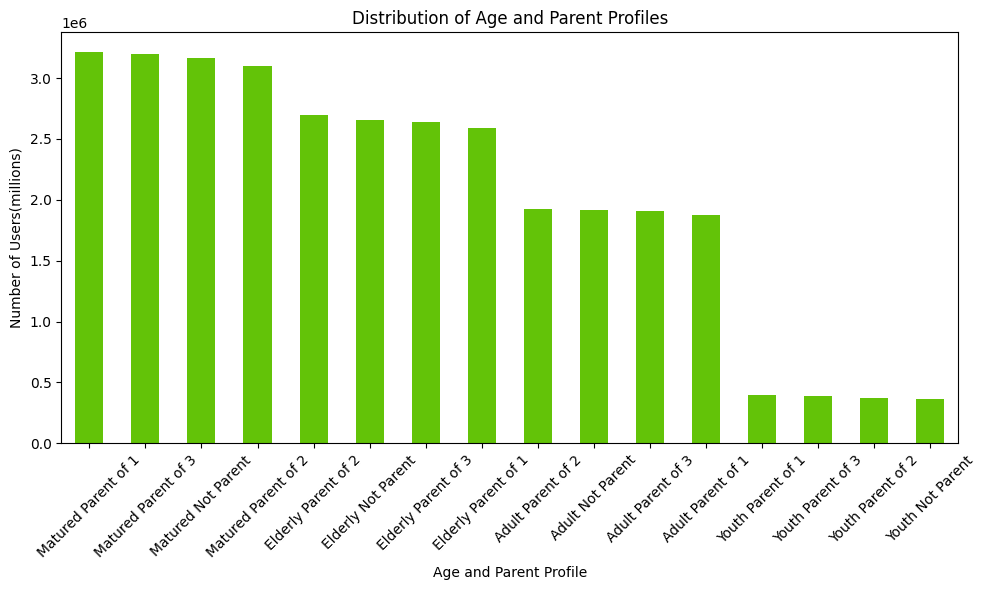

In [60]:
# creating a bar plot for df_order_product_merge['age_parent_profile']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
age_parent_hist = merged_df['age_parent_profile'].value_counts().plot(kind='bar', color= '#63C308')  # Make a bar plot

# labels and title
plt.xlabel('Age and Parent Profile')
plt.ylabel('Number of Users(millions)')
plt.title('Distribution of Age and Parent Profiles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust subplots to give some padding

# Save the plot as a PNG file
plt.savefig(os.path.join(path, "age_parent_profile.png"))
plt.show()


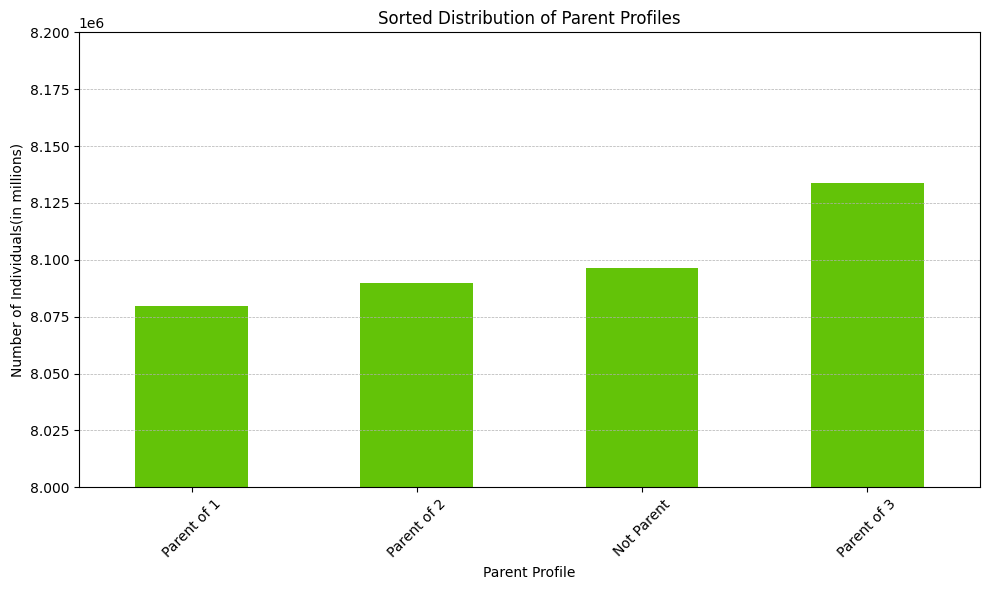

In [61]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
# Sorting the counts in ascending order
merged_df['parents_profile'].value_counts().sort_values().plot(kind='bar', color='#63C308')  # Make a bar plot

# labels and title
plt.xlabel('Parent Profile')
plt.ylabel('Number of Individuals(in millions)')
plt.title('Sorted Distribution of Parent Profiles')
plt.xticks(rotation=45)  

plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.ylim(8000000, 8200000)  

plt.tight_layout()  

# Save the plot as a PNG file
plt.savefig(os.path.join(path, "parent_profile.png"))
plt.show()

In [62]:
merged_df['parents_profile'].value_counts()


parents_profile
Parent of 3    8133827
Not Parent     8096275
Parent of 2    8089749
Parent of 1    8079881
Name: count, dtype: int64

# Create a bar plot for each income earner profile and age profile


In [63]:
# Group by 'income_earner_profile' and 'age_profile', and count entries in each group
grouped_data = merged_df.groupby(['age_profile', 'income_profile']).size().unstack(fill_value=0)


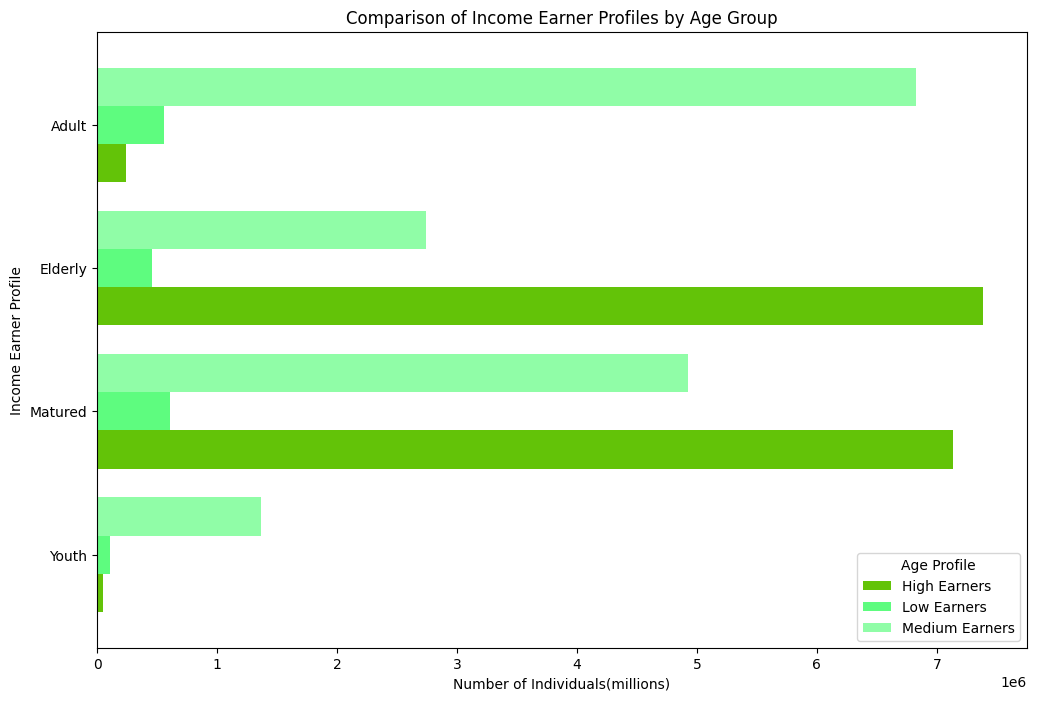

In [64]:

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.sort_index(ascending=False).plot(kind='barh', ax=ax, color=['#63C308', '#5EFC7F', '#90FDA7','#B8FEC7'], width=0.8)
# labels and title
ax.set_xlabel('Number of Individuals(millions)')
ax.set_ylabel('Income Earner Profile')
ax.set_title('Comparison of Income Earner Profiles by Age Group')

# Add legend
ax.legend(title='Age Profile')



# Save the plot as a PNG file
plt.savefig(os.path.join(path, "age_income_earner_profiles.png"))

# Show the plot
plt.show()



# Customer income Profile 

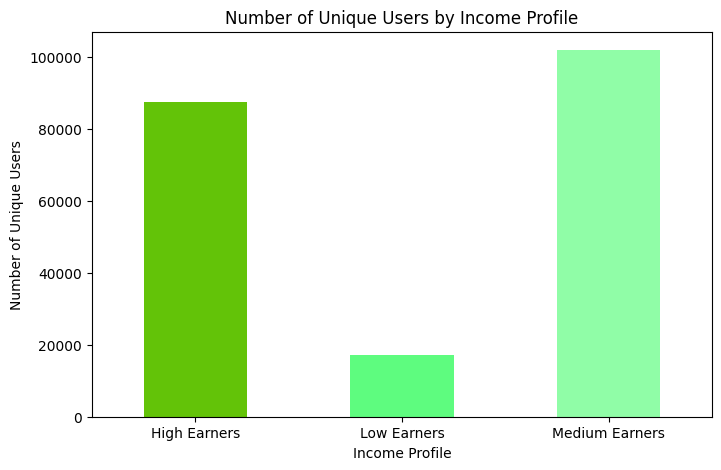

In [65]:
# Group by income_profile, and count unique users in each category
grouped_counts = merged_df.groupby('income_profile')['user_id'].nunique()

# Create a bar plot
plt.figure(figsize=(8, 5))
grouped_counts.plot(kind='bar', color=['#63C308', '#5EFC7F', '#90FDA7','#B8FEC7'])

# Adding labels and title
plt.xlabel('Income Profile')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users by Income Profile')
plt.xticks(rotation=0)  # Keep the labels on the x-axis readable



# Save the plot as a PNG file
plt.savefig(os.path.join(path,'user_income_earner_profiles.png'))
# Show plot
plt.show()


# the Total number of users in each category of income earners

# Create a Pie Plot for Age Profile

In [66]:
# Count the occurrences of each age profile
age_profile_counts = merged_df['age_profile'].value_counts()


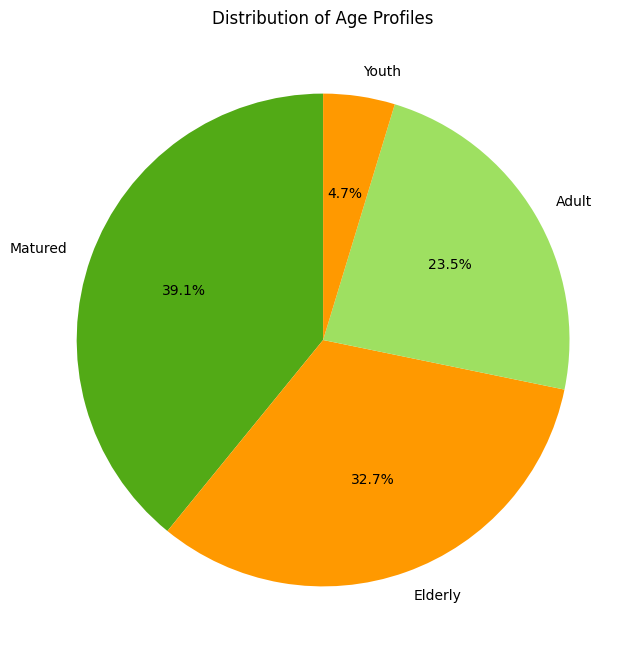

In [67]:
# Create a pie plot
plt.figure(figsize=(8, 8)) 
plt.pie(age_profile_counts, labels=age_profile_counts.index, autopct='%1.1f%%', startangle=90, colors = ['#52aa16', '#ff9900', '#9ee061','#ff9900'] ) 

# Add a title
plt.title('Distribution of Age Profiles')

# Save the plot as a PNG file
plt.savefig(os.path.join(path, "age_profile_pie.png"), bbox_inches='tight')
# Show the plot
plt.show()


In [68]:
merged_df.head(10)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,Region,exclusion,age_profile,income_profile,age_dependant_profile,marital status with kids,parents_profile,age_parent_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3


# Marital Profile plot

In [69]:
# create a bar plot for df_merge['marital_status']

In [70]:
# create 'marital status with kids' plot

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [71]:
income_aggregated_data = merged_df.groupby(['income_profile']).agg(
    max_usage=('order_number', 'max'),
    mean_usage=('order_number', 'mean'),
    min_usage=('order_number', 'min'),
    max_expenditure=('prices', 'max'),
    mean_expenditure=('prices', 'mean'),
    min_expenditure=('prices', 'min')
)
income_aggregated_data

,max_usage,mean_usage,min_usage,max_expenditure,mean_expenditure,min_expenditure
income_profile,,,,,,
High Earners,99,17.278381,1,25.0,7.959257,1.0
Low Earners,99,15.705271,1,25.0,6.495264,1.0
Medium Earners,99,17.172328,1,25.0,7.774990,1.0


In [72]:
# aggregate the max, mean, and min variables on a customer parent-profile level for usage frequency(order_number) 

parent_aggregated_data = merged_df.groupby(['parents_profile']).agg(
    max_usage=('order_number', 'max'),
    mean_usage=('order_number', 'mean'),
    min_usage=('order_number', 'min'),
    max_expenditure=('prices', 'max'),
    mean_expenditure=('prices', 'mean'),
    min_expenditure=('prices', 'min')
)
parent_aggregated_data

,max_usage,mean_usage,min_usage,max_expenditure,mean_expenditure,min_expenditure
parents_profile,,,,,,
Not Parent,99,17.264951,1,25.0,7.789975,1.0
Parent of 1,99,17.098291,1,25.0,7.795927,1.0
Parent of 2,99,17.063314,1,25.0,7.784436,1.0
Parent of 3,99,17.143668,1,25.0,7.793631,1.0


In [73]:
# aggregate the max, mean, and min variables on a customer age-profile level for usage frequency(order_number) which will be the customer loyalty

age_aggregated_data = merged_df.groupby(['age_profile']).agg(
    max_usage=('order_number', 'max'),
    mean_usage=('order_number', 'mean'),
    min_usage=('order_number', 'min'),
    max_expenditure=('prices', 'max'),
    mean_expenditure=('prices', 'mean'),
    min_expenditure=('prices', 'min')
)
age_aggregated_data

,max_usage,mean_usage,min_usage,max_expenditure,mean_expenditure,min_expenditure
age_profile,,,,,,
Adult,99,17.128658,1,25.0,7.783016,1.0
Elderly,99,17.134887,1,25.0,7.795979,1.0
Matured,99,17.174837,1,25.0,7.791099,1.0
Youth,99,16.997593,1,25.0,7.795420,1.0


In [74]:
average_orders_per_hour = merged_df.groupby('order_hour_of_day')['order_number'].value_counts()

In [75]:
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Analysis\visualisations"

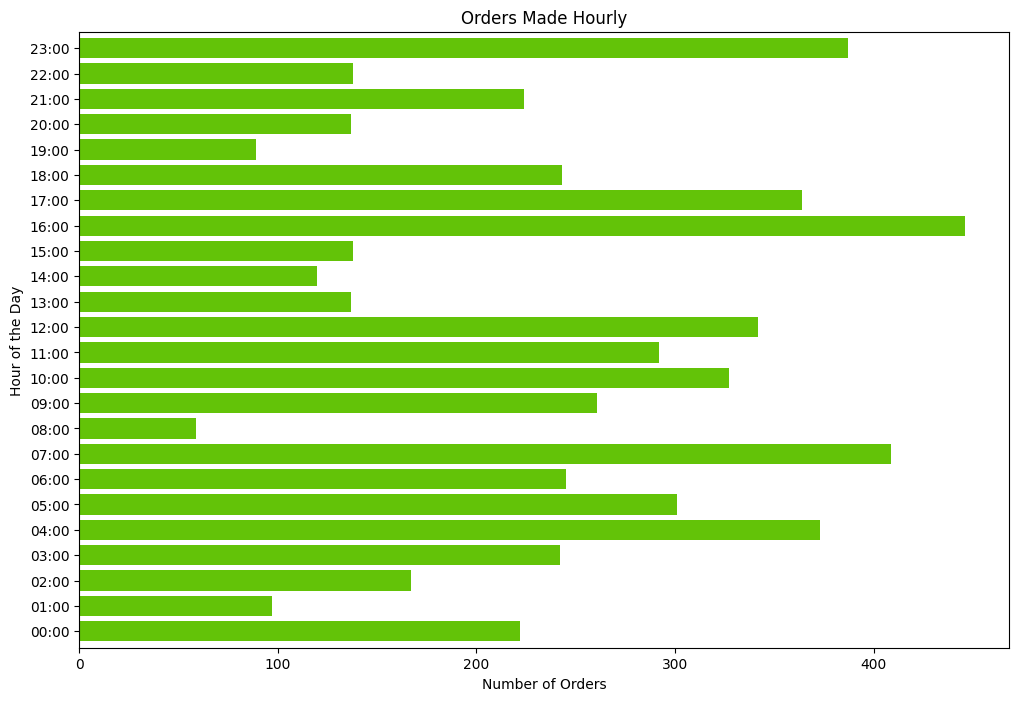

In [76]:

# Seed for reproducibility
np.random.seed(0) 

# Generate random data for orders
data = np.random.randint(50, 500, size=24)  
hours = [f"{hour:02d}:00" for hour in range(24)]  # 24-hour format
average_orders_per_hour = pd.Series(data, index=hours)

# Create a horizontal bar plot sorted by hour
fig, ax = plt.subplots(figsize=(12, 8))
average_orders_per_hour.plot(kind='barh', ax=ax, color=['#63C308'], width=0.8)

ax.set_xlabel('Number of Orders')
ax.set_ylabel('Hour of the Day')
ax.set_title('Orders Made Hourly')

path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Analysis\visualisations"
plt.savefig(os.path.join(path, 'Hourly_Orders.png'))
plt.show()


In [77]:
average_orders_per_day = merged_df.groupby('order_days_of_week')['order_number'].mean()

In [78]:
merged_df['order_hour_of_day'].describe

<bound method NDFrame.describe of 0            8
1            7
2           12
3            7
4           15
            ..
32404854    15
32404855    11
32404856     7
32404857     5
32404858    14
Name: order_hour_of_day, Length: 32399732, dtype: int64>

C:\Users\okumb\AppData\Local\Temp\ipykernel_15464\2060908995.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_orders = df.groupby('hour_range')['order_number'].sum().reset_index()


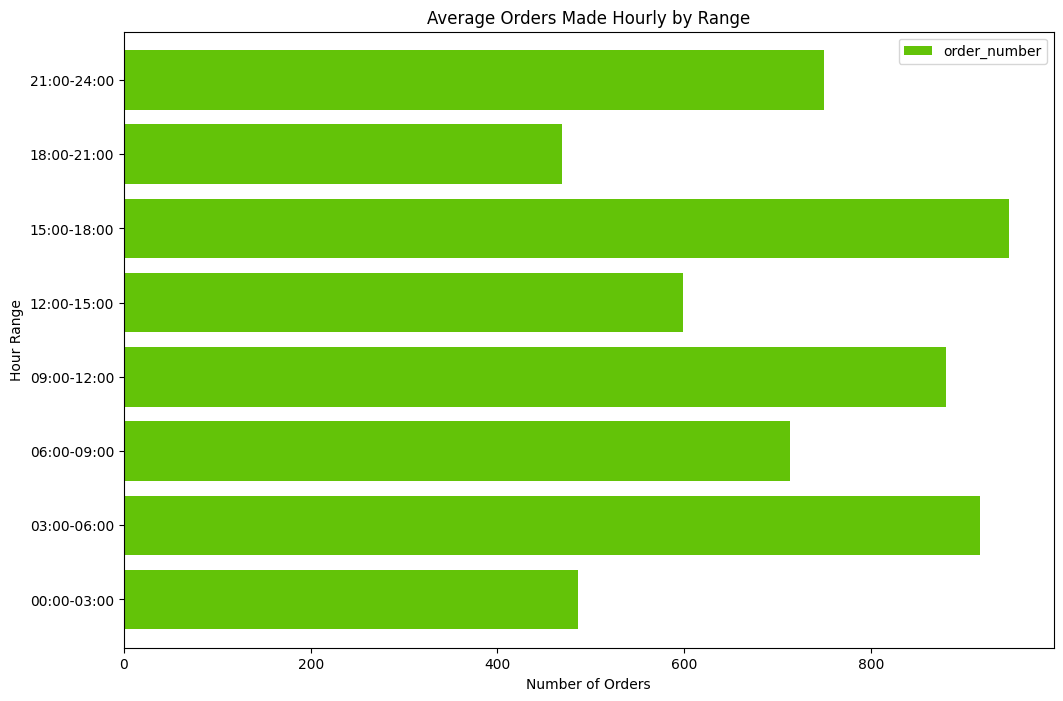

Peak hours: 15:00-18:00
Non-peak hours: 18:00-21:00
Normal hours: 00:00-03:00, 03:00-06:00, 06:00-09:00, 09:00-12:00, 12:00-15:00, 21:00-24:00


In [79]:
np.random.seed(0)

data = np.random.randint(50, 500, size=24)
hours = [f"{hour:02d}:00" for hour in range(24)]  # 24-hour format
df = pd.DataFrame({'hours_order': hours, 'order_number': data})

# Convert 'hours_order' 
df['hour'] = pd.to_datetime(df['hours_order'], format='%H:%M').dt.hour

# Define hour ranges
hour_bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
hour_labels = ['00:00-03:00', '03:00-06:00', '06:00-09:00', '09:00-12:00', '12:00-15:00', '15:00-18:00', '18:00-21:00', '21:00-24:00']

# Create the hour range column
df['hour_range'] = pd.cut(df['hour'], bins=hour_bins, labels=hour_labels, right=False, include_lowest=True)

# Group by the hour range and calculate the sum of orders in each range
grouped_orders = df.groupby('hour_range')['order_number'].sum().reset_index()

# Sort the data by hour range order
grouped_orders = grouped_orders.sort_index()


fig, ax = plt.subplots(figsize=(12, 8))
grouped_orders.plot(kind='barh', x='hour_range', y='order_number', ax=ax, color=['#63C308'], width=0.8)

ax.set_xlabel('Number of Orders')
ax.set_ylabel('Hour Range')
ax.set_title('Average Orders Made Hourly by Range')
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Analysis\visualisations"
plt.savefig(os.path.join(path, 'Hourly_Orders_by_Range.png'))
plt.show()

# Identify peak, normal, and non-peak hours
peak_hours = grouped_orders.loc[grouped_orders['order_number'].idxmax(), 'hour_range']
non_peak_hours = grouped_orders.loc[grouped_orders['order_number'].idxmin(), 'hour_range']
normal_hours = grouped_orders[~grouped_orders['hour_range'].isin([peak_hours, non_peak_hours])]['hour_range'].tolist()

print(f"Peak hours: {peak_hours}")
print(f"Non-peak hours: {non_peak_hours}")
print(f"Normal hours: {', '.join(normal_hours)}")


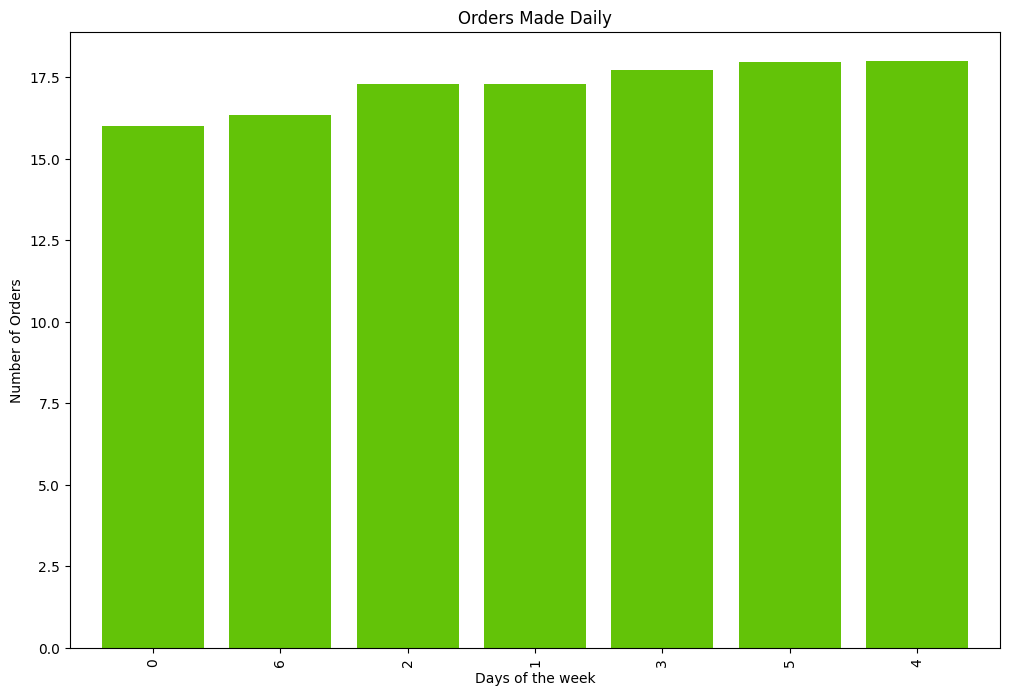

In [80]:

sorted_orders = average_orders_per_day.sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))
sorted_orders.plot(kind='bar', ax=ax, color=['#63C308'], width=0.8)

ax.set_xlabel('Days of the week')
ax.set_ylabel('Number of Orders')
ax.set_title('Orders Made Daily')
plt.savefig(os.path.join(path,'Daily_Orders.png'))
plt.show()

In [81]:
# Group by 'spending_flag' and  'order_hour_of_day'
Hourly_spending = merged_df.groupby(['order_hour_of_day', 'spending_flag']).size().unstack(fill_value=0)

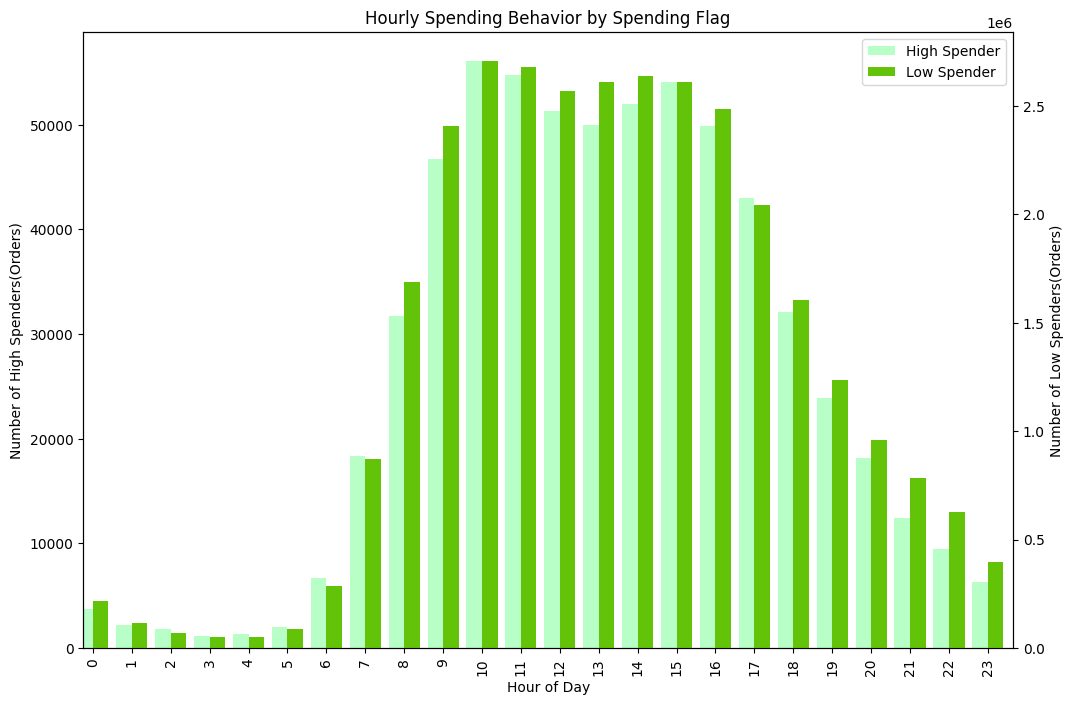

In [82]:

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the data for High Spender
Hourly_spending['High Spender'].plot(kind='bar', ax=ax1, color='#B8FEC7', width=0.4, position=1, label='High Spender')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of High Spenders(Orders)')
ax1.set_title('Hourly Spending Behavior by Spending Flag')

# Create a second y-axis for Low Spender
ax2 = ax1.twinx()
Hourly_spending['Low Spender'].plot(kind='bar', ax=ax2, color='#63C308', width=0.4, position=0, label='Low Spender')
ax2.set_ylabel('Number of Low Spenders(Orders)')

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

# Save the plot
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Analysis\visualisations"
plt.savefig(os.path.join(path, 'Hourly_Spending.png'))

# Show the plot
plt.show()


In [83]:
# aggregate the max, mean, and min variables on a customer-profile level for the expenditure (the product price) which will be the customer spending habits

merged_df.head()


,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,Region,exclusion,age_profile,income_profile,age_dependant_profile,marital status with kids,parents_profile,age_parent_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3


In [97]:
sum_price = merged_df.groupby('product_name')['prices'].sum().reset_index()
print("Sum of Prices:\n", sum_price)

Sum of Prices:
                                             product_name  prices
0                                      #2 Coffee Filters  8547.0
1                           #2 Cone White Coffee Filters    74.1
2                                  #2 Mechanical Pencils    73.6
3                        #4 Natural Brown Coffee Filters   602.5
4                                                 #NAME?   104.4
...                                                  ...     ...
49654  with Xylitol Unwrapped Original Flavor 50 Stic...   199.8
49655  with Xylitol Unwrapped Spearmint 50 Sticks Sug...   286.0
49656  with Xylitol Watermelon Twist 18 Sticks Sugar ...   238.0
49657               with a Splash of Mango Coconut Water    59.8
49658           with a Splash of Pineapple Coconut Water   222.6

[49659 rows x 2 columns]


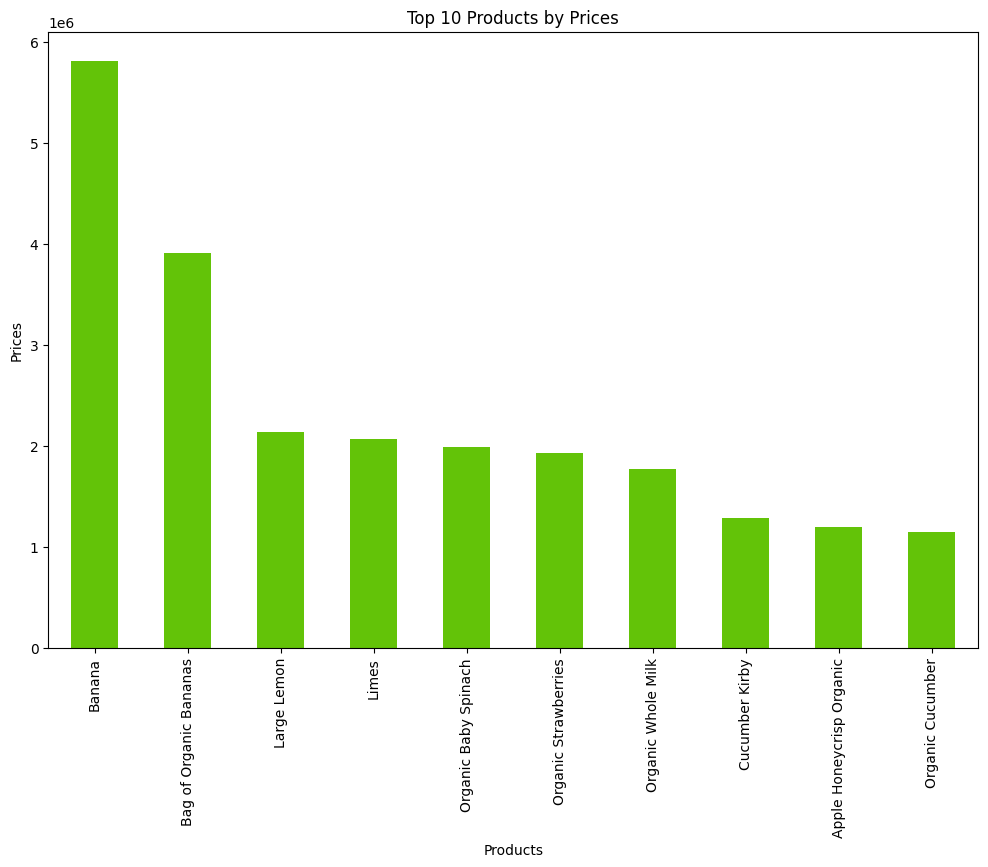

In [99]:
sorted_df = sum_price.sort_values(by='prices', ascending=False)

# Select the top 10 products
top_n = 10
top_n_df = sorted_df.head(top_n)


fig, ax = plt.subplots(figsize=(12, 8))
top_n_df.plot(kind='bar', x='product_name', y='prices', ax=ax, color='#63C308', legend=False)

# Set labels and title
ax.set_xlabel('Products')
ax.set_ylabel('Prices')
ax.set_title('Top 10 Products by Prices')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the plot
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Analysis\visualisations"
plt.savefig(os.path.join(path, 'Top_10_Products_by_Sum_of_Prices.png'))

# Show the plot
plt.show()




# Compare your customer profiles with regions and departments. Can you identify a link between them? 
# Customers may demonstrate different behaviors across regions, which could make this information important.

In [86]:
# Income Profile

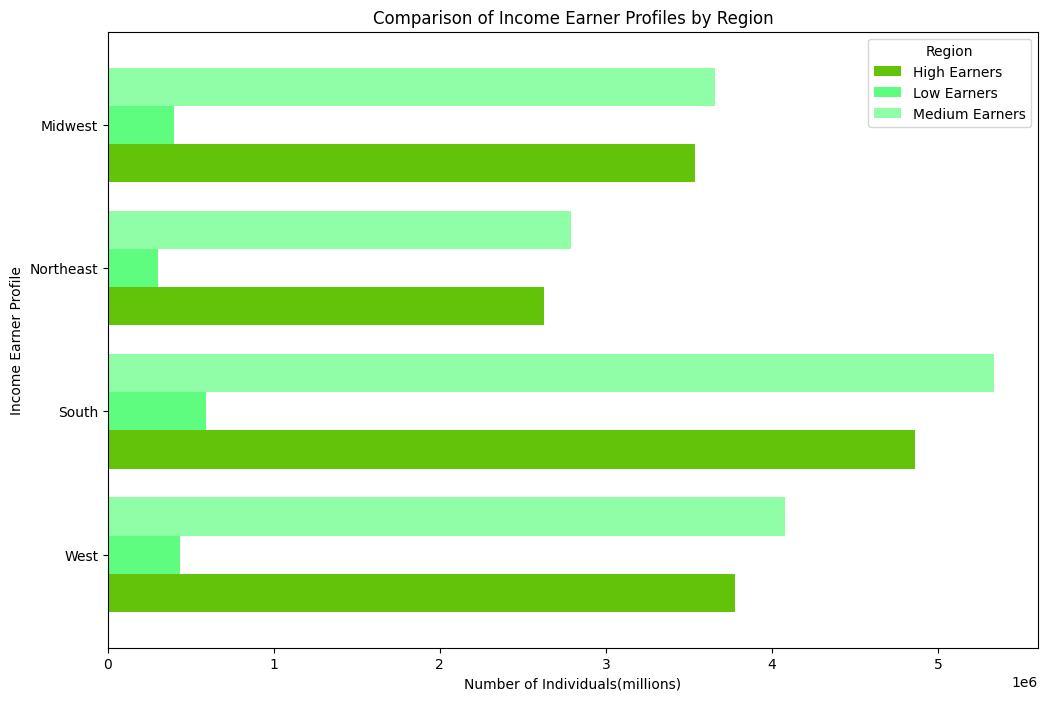

In [87]:

# Group by 'income_earner_profile' and 'Region', and count entries in each group
income_grouped_data = merged_df.groupby(['Region', 'income_profile']).size().unstack(fill_value=0)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))
income_grouped_data.sort_index(ascending=False).plot(kind='barh', ax=ax, color=['#63C308', '#5EFC7F', '#90FDA7','#B8FEC7'], width=0.8)
# labels and title
ax.set_xlabel('Number of Individuals(millions)')
ax.set_ylabel('Income Earner Profile')
ax.set_title('Comparison of Income Earner Profiles by Region')

# Add legend
ax.legend(title='Region')
# Save the plot as a PNG file
plt.savefig(os.path.join(path,'Region_income_earner_profiles.png'))

# Show the plot
plt.show()

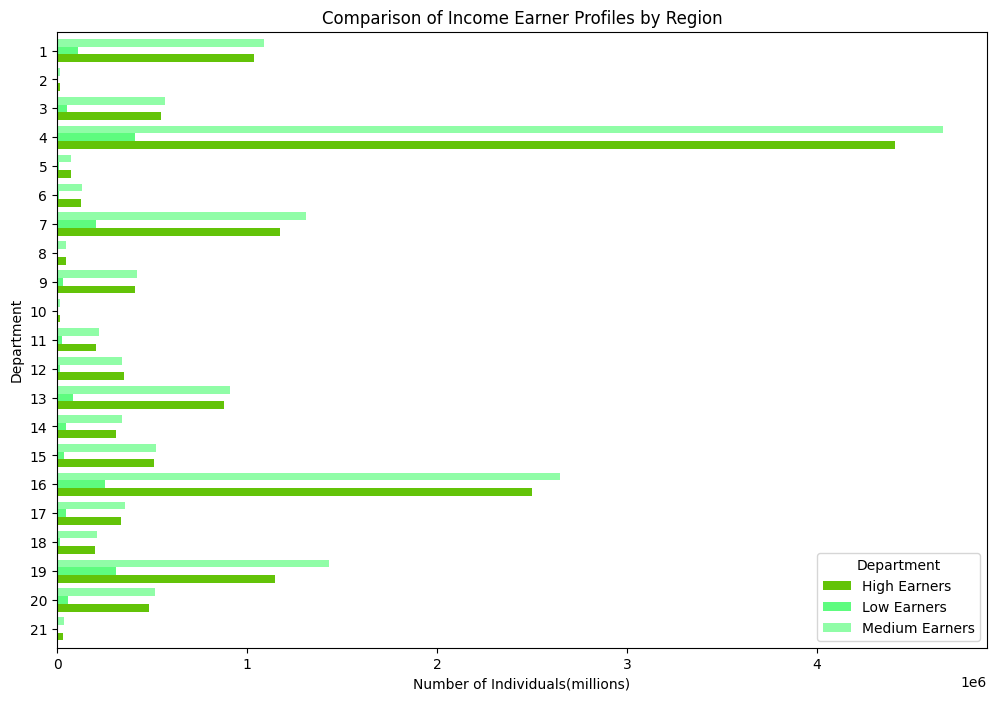

In [88]:

# Group by 'income_earner_profile' and 'Department', and count entries in each group
income_grouped_data_dept = merged_df.groupby(['department_id', 'income_profile']).size().unstack(fill_value=0)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))
income_grouped_data_dept.sort_index(ascending=False).plot(kind='barh', ax=ax, color=['#63C308', '#5EFC7F', '#90FDA7','#B8FEC7'], width=0.8)
# labels and title
ax.set_xlabel('Number of Individuals(millions)')
ax.set_ylabel('Department')
ax.set_title('Comparison of Income Earner Profiles by Region')

# Add legend
ax.legend(title='Department')
# Save the plot as a PNG file
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Analysis\visualisations"
plt.savefig(os.path.join(path,'Department_income_earner_profiles.png'))
# Show the plot
plt.show()

# The most striking pattern is that all departments have a higher number of medium earners than both low and high earners.

# The differences between the number of high and low earners are less marked but consistently, departments have more high earners than low earners.

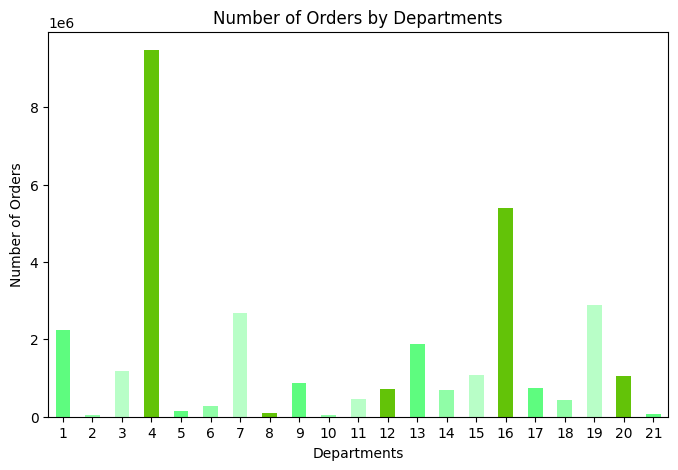

In [89]:

# Group by income_profile, and count unique users in each category
grouped_counts1 = merged_df.groupby('department_id')['order_number'].size()

# Create a bar plot
plt.figure(figsize=(8, 5))
grouped_counts1.plot(kind='bar', color=[ '#5EFC7F', '#90FDA7','#B8FEC7', '#63C308'])

# Adding labels and title
plt.xlabel('Departments')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Departments')
plt.xticks(rotation=0)  # Keep the labels on the x-axis readable
plt.savefig(os.path.join(path, 'order_by_department.png'))
# Show plot
plt.show()


# spending_flag Profile

In [90]:
merged_df.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,Region,exclusion,age_profile,income_profile,age_dependant_profile,marital status with kids,parents_profile,age_parent_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3


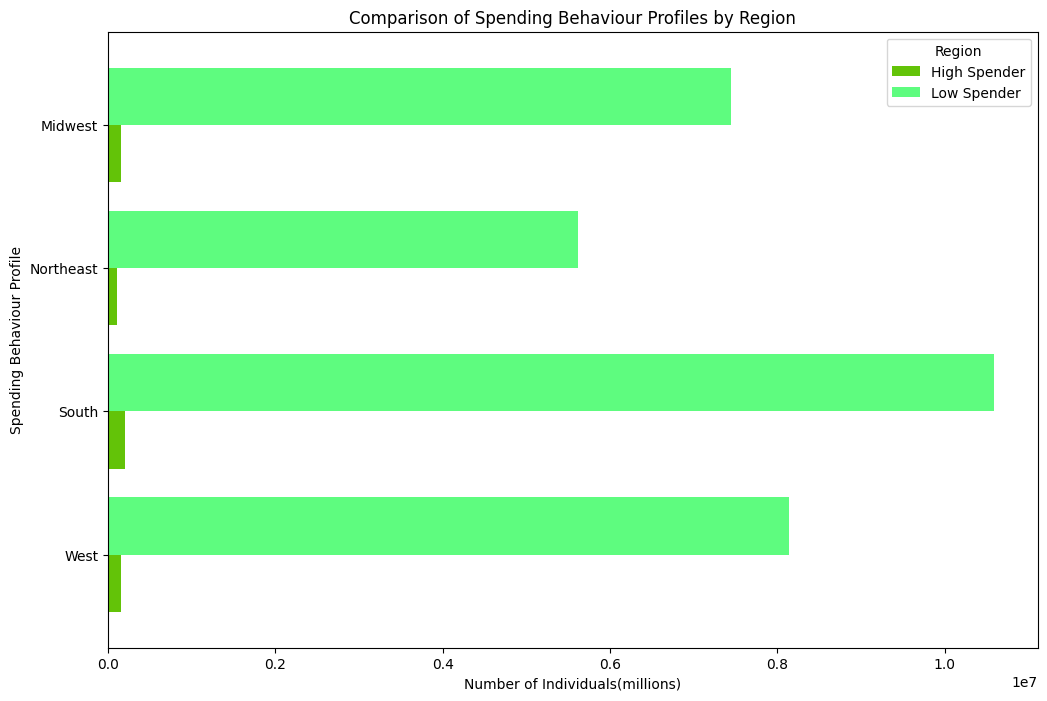

In [91]:

# Group by 'spending_flag' and 'Region', and count entries in each group
spending_1_grouped_data = merged_df.groupby(['Region', 'spending_flag']).size().unstack(fill_value=0)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))
spending_1_grouped_data.sort_index(ascending=False).plot(kind='barh', ax=ax, color=['#63C308', '#5EFC7F', '#90FDA7','#B8FEC7'], width=0.8)
# labels and title
ax.set_xlabel('Number of Individuals(millions)')
ax.set_ylabel('Spending Behaviour Profile')
ax.set_title('Comparison of Spending Behaviour Profiles by Region')

# Add legend
ax.legend(title='Region')
# Save the plot as a PNG file
plt.savefig(os.path.join(path,'Spending Behaviour Profiles.png'))

# Show the plot
plt.show()

In [92]:
merged_df.head()


,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,average_price,spending_flag,median_days_before_order,order_frequency_flag,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,Region,exclusion,age_profile,income_profile,age_dependant_profile,marital status with kids,parents_profile,age_parent_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Low Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,99,New Customer,6.367797,Low Spender,20.5,Frequent Customer,Female,Alabama,31,2019-02-17,3,married,40423,South,High Activity,Adult,Medium Earners,married with no kids,married with 3 kids,Parent of 3,Adult Parent of 3


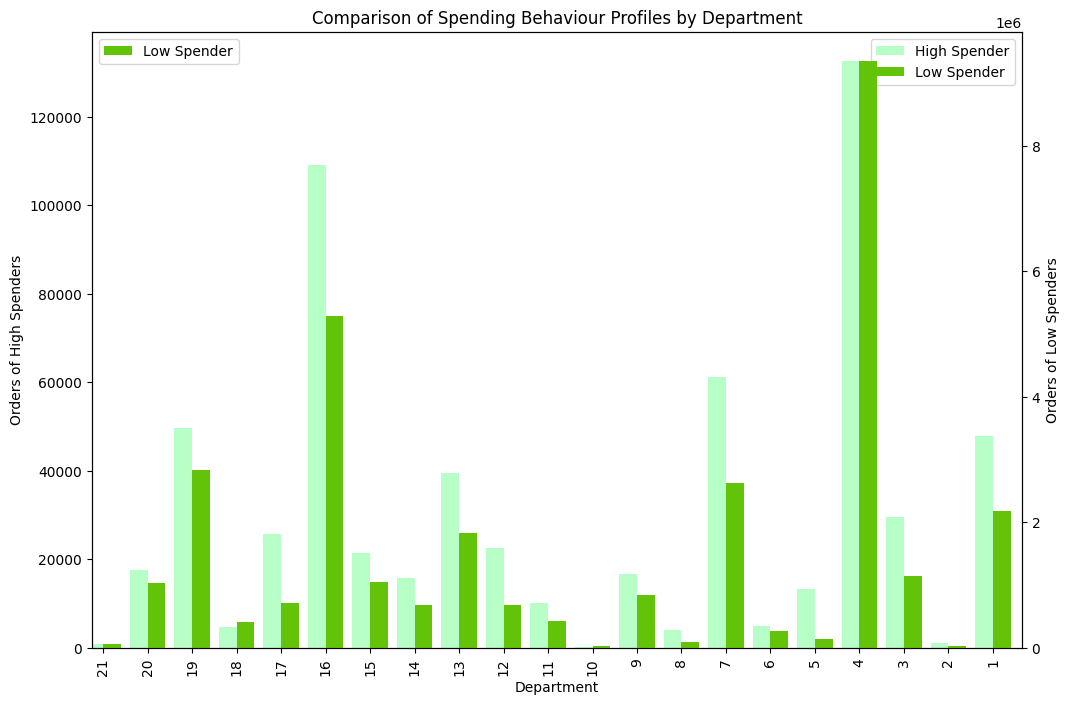

In [93]:

# Group by 'department_id' and 'spending_flag', and count entries in each group
spending_2_grouped_data = merged_df.groupby(['department_id', 'spending_flag']).size().unstack(fill_value=0)

fig, ax1 = plt.subplots(figsize=(12, 8))


# Plot the first y-axis (High Spender)
spending_2_grouped_data['High Spender'].sort_index(ascending=False).plot(kind='bar', ax=ax1, color='#B8FEC7', width=0.4, position=1, label='High Spender', legend=True)
ax1.set_xlabel('Department')
ax1.set_ylabel('Orders of High Spenders')
ax1.set_title('Comparison of Spending Behaviour Profiles by Department')

# Create a second y-axis (Low Spender)
ax2 = ax1.twinx()
spending_2_grouped_data['Low Spender'].sort_index(ascending=False).plot(kind='bar', ax=ax2, color='#63C308', width=0.4, position=0, label='Low Spender', legend=True)
ax2.set_ylabel('Orders of Low Spenders')

# Add legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right')
# Save the plot
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Analysis\visualisations"
plt.savefig(os.path.join(path, 'Department_spender_profiles.png'))

# Show the plot
plt.show()

# Exporting the final Dataframe

In [94]:
path = r"C:\Users\okumb\Downloads\instaCart_Bucket_04_2024\Data\Prepared_Data"

In [95]:
# Exporting the final dataframe

#merged_df.to_pickle(os.path.join(path, "final_df.pkl"))

# commenting it out because it has already being exported